## Nama : Ashadi Permana
## NIM : 2209106033
## Kelas Praktikum : A22

### Untuk Mengimport Library Pandas dan di deklarasikan ke pd

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Untuk Meng Read File CSV

In [2]:
dfAnime = pd.read_csv("Animes.csv")


In [3]:
dfAnime.head()

,position,title,episodes,release_date,members,score,details,broadcast,studios,source,genres,themes,demographic,popularity
0,1.0,Fullmetal Alchemist: Brotherhood,TV (64 eps),Apr 2009 - Jul 2010,3018336,9.12,https://myanimelist.net/anime/5114/Fullmetal_A...,Sundays at 17:00 (JST),Bones,Manga,"Action, Adventure, Drama, Fantasy",Military,Shounen,3
1,2.0,Kaguya-sama wa Kokurasetai: Ultra Romantic,TV (13 eps),Apr 2022 - Jun 2022,687194,9.10,https://myanimelist.net/anime/43608/Kaguya-sam...,Saturdays at 00:00 (JST),A-1 Pictures,Manga,"Comedy, Romance","Psychological, School",Seinen,242
2,3.0,Bleach: Sennen Kessen-hen,TV (? eps),Oct 2022 -,278650,9.08,https://myanimelist.net/anime/41467/Bleach__Se...,Tuesdays at 00:00 (JST),Pierrot,Manga,"Action, Adventure, Fantasy",NaN,Shounen,748
3,4.0,Gintama°,TV (51 eps),Apr 2015 - Mar 2016,563143,9.08,https://myanimelist.net/anime/28977/Gintama°,Wednesdays at 18:00 (JST),Bandai Namco Pictures,Manga,"Action, Comedy, Sci-Fi","Gag Humor, Historical, Parody, Samurai",Shounen,337
4,5.0,Steins;Gate,TV (24 eps),Apr 2011 - Sep 2011,2324018,9.08,https://myanimelist.net/anime/9253/Steins_Gate,Wednesdays at 02:05 (JST),White Fox,Visual,"Drama, Sci-Fi, Suspense","Psychological, Time Travel",NaN,13


### MELIHAT INFO DARI DATASET

In [4]:
dfAnime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23070 entries, 0 to 23069
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   position      21150 non-null  float64
 1   title         23070 non-null  object 
 2   episodes      23070 non-null  object 
 3   release_date  23070 non-null  object 
 4   members       23070 non-null  int64  
 5   score         23070 non-null  float64
 6   details       23070 non-null  object 
 7   broadcast     7238 non-null   object 
 8   studios       23070 non-null  object 
 9   source        23070 non-null  object 
 10  genres        10609 non-null  object 
 11  themes        12543 non-null  object 
 12  demographic   9054 non-null   object 
 13  popularity    23070 non-null  int64  
dtypes: float64(2), int64(2), object(10)
memory usage: 2.5+ MB


### Fungsi train_test_split dari pustaka scikit-learn (sklearn) digunakan untuk membagi dataset menjadi dua subset yang berbeda

### MELAKUKAN DATA PRE PROCESSING TERLEBIH DAHULU

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

### MENANGANI NILAI NULL

In [6]:
dfAnime["position"].fillna(dfAnime["position"].mean(), inplace= True)
dfAnime["members"].fillna(dfAnime["members"].median(), inplace= True)
dfAnime["demographic"].fillna(dfAnime["demographic"].mode()[0], inplace= True)
dfAnime["broadcast"].fillna(dfAnime["broadcast"].mode()[0], inplace= True)
dfAnime["genres"].fillna(dfAnime["genres"].mode()[0], inplace= True)
dfAnime["themes"].fillna(dfAnime["themes"].mode()[0], inplace= True)
dfAnime.isna().sum()

position        0
title           0
episodes        0
release_date    0
members         0
score           0
details         0
broadcast       0
studios         0
source          0
genres          0
themes          0
demographic     0
popularity      0
dtype: int64

### mengecek nilai duplikat

In [7]:
print("total nilai duplikat : ")
dfAnime.duplicated().sum()

total nilai duplikat : 


0

### MENGHILANGKAN OUTLIER

In [8]:
from scipy import stats
import numpy as np

df = dfAnime[(np.abs(stats.zscore(dfAnime.select_dtypes(['int64' , 'float64']))) <3).all(axis=1)]

In [9]:
dfAnime.select_dtypes(['int64' , 'float64']).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23070 entries, 0 to 23069
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   position    23070 non-null  float64
 1   members     23070 non-null  int64  
 2   score       23070 non-null  float64
 3   popularity  23070 non-null  int64  
dtypes: float64(2), int64(2)
memory usage: 721.1 KB


In [10]:
dfAnime.select_dtypes('object').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23070 entries, 0 to 23069
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         23070 non-null  object
 1   episodes      23070 non-null  object
 2   release_date  23070 non-null  object
 3   details       23070 non-null  object
 4   broadcast     23070 non-null  object
 5   studios       23070 non-null  object
 6   source        23070 non-null  object
 7   genres        23070 non-null  object
 8   themes        23070 non-null  object
 9   demographic   23070 non-null  object
dtypes: object(10)
memory usage: 1.8+ MB


### MENGHAPUS KOLOM YANG TIDAK DIPERLUKAN 

In [11]:
dfAnime = dfAnime.drop(['details'], axis=1)
dfAnime = dfAnime.drop(['broadcast'], axis=1)
dfAnime = dfAnime.drop(['themes'], axis=1)

### MENGHAPUS RECORD ,HANYA MENYISAKAN 5000 RECORD ,AGAR PROSES SVM CEPAT

In [12]:
dfAnime = dfAnime.drop(dfAnime.index[5000:])

In [13]:
dfAnime.select_dtypes('object').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         5000 non-null   object
 1   episodes      5000 non-null   object
 2   release_date  5000 non-null   object
 3   studios       5000 non-null   object
 4   source        5000 non-null   object
 5   genres        5000 non-null   object
 6   demographic   5000 non-null   object
dtypes: object(7)
memory usage: 273.6+ KB


In [14]:
dfAnime.head()

,position,title,episodes,release_date,members,score,studios,source,genres,demographic,popularity
0,1.0,Fullmetal Alchemist: Brotherhood,TV (64 eps),Apr 2009 - Jul 2010,3018336,9.12,Bones,Manga,"Action, Adventure, Drama, Fantasy",Shounen,3
1,2.0,Kaguya-sama wa Kokurasetai: Ultra Romantic,TV (13 eps),Apr 2022 - Jun 2022,687194,9.10,A-1 Pictures,Manga,"Comedy, Romance",Seinen,242
2,3.0,Bleach: Sennen Kessen-hen,TV (? eps),Oct 2022 -,278650,9.08,Pierrot,Manga,"Action, Adventure, Fantasy",Shounen,748
3,4.0,Gintama°,TV (51 eps),Apr 2015 - Mar 2016,563143,9.08,Bandai Namco Pictures,Manga,"Action, Comedy, Sci-Fi",Shounen,337
4,5.0,Steins;Gate,TV (24 eps),Apr 2011 - Sep 2011,2324018,9.08,White Fox,Visual,"Drama, Sci-Fi, Suspense",Kids,13


# POSTTEST 5 

# A. SUPERVISED LEARNING

##### deklarasi variabel kolom

In [15]:
posisi = 'position'
member ='members'
popularity = 'popularity'
demo = 'demographic'

In [16]:
# Pemisahan data

X = dfAnime[[posisi , member ,popularity]]
y = dfAnime[demo]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30)

### Normalisasi

In [17]:
mm = MinMaxScaler()
X_train = mm.fit_transform(X_train)
X_test = mm.transform(X_test)

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

## SVM

### A1 & A2 MENGGUNAKAN SVM DAN MELAKUKAN EVALUASI MODEL 

In [18]:
# Model SVM dengan kernel linear
svm_model = SVC(kernel='linear')  
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

### MELAKUKAN PREDIKSI MODEL

In [19]:
# Prediksi
y_pred = svm_model.predict(X_test)
sv = svm_model.support_vectors_ #ambil nilai suport vektor dari objek

### menghitung Confusion Matrix, kemudian memvisualisasikannya dengan heatmap menggunakan Matplotlib dan Seaborn


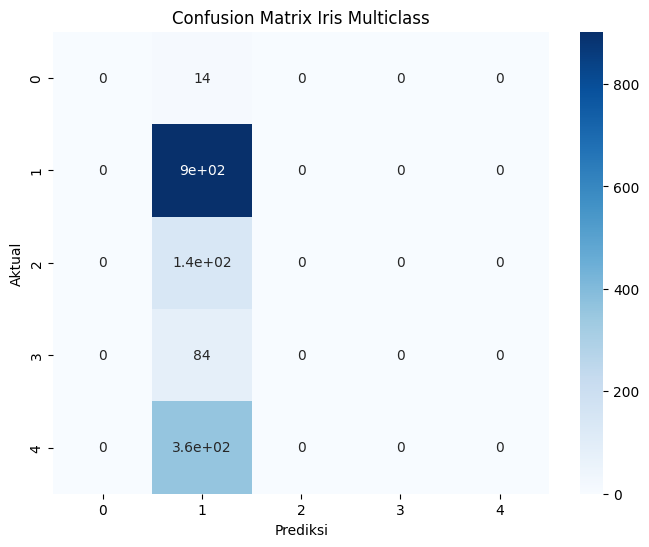

In [20]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

# Visualisasi Confusion Matrix dengan Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix Iris Multiclass')
plt.show()

### MELAKUKAN EVALUASI MODEL MENGGUNAKAN KLASIFIKASI REPORT

In [21]:
#evaluasi model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.6013333333333334
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.60      1.00      0.75       902
           2       0.00      0.00      0.00       141
           3       0.00      0.00      0.00        84
           4       0.00      0.00      0.00       359

    accuracy                           0.60      1500
   macro avg       0.12      0.20      0.15      1500
weighted avg       0.36      0.60      0.45      1500



c:\Users\ashad\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ashad\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ashad\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

### A3. PLOT HASIL PREDIKSI 

c:\Users\ashad\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ashad\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ashad\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ashad\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

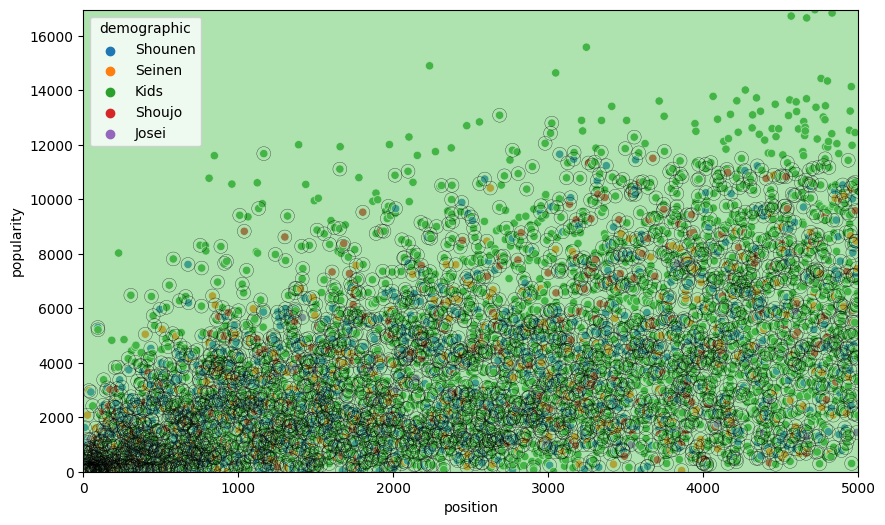

In [22]:
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns


# Mengasumsikan 'dfAnime' adalah DataFrame Anda yang berisi data
# Gantilah ini dengan data dan variabel target yang sebenarnya
# Ganti 'target' dengan variabel target yang sebenarnya dalam DataFrame Anda
X = dfAnime[[posisi, popularity]]
y = dfAnime[demo]

# Mengasumsikan 'svm_model' adalah model SVM yang telah dilatih pada data
# Gantilah ini dengan model SVM Anda yang sebenarnya
svm_model = SVC()
svm_model.fit(X, y)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=posisi, y=popularity, hue=demo, data=dfAnime)

ax = plt.gca()

DecisionBoundaryDisplay.from_estimator(
    estimator=svm_model,
    X=X.values,  # Gunakan .values untuk mengonversi ke array NumPy
    plot_method="contourf",
    levels=[-1, 0, 1],
    alpha=0.5,
    linestyles=["--", "-", "--"],
    ax=ax,
)

# Plot support vectors
ax.scatter(
    svm_model.support_vectors_[:, 0],
    svm_model.support_vectors_[:, 1],
    s=100,
    linewidth=0.2,
    facecolors="none",
    edgecolors="k",
)

plt.xlabel(posisi)
plt.ylabel(popularity)
plt.show()


## B. UNSUPERVISED LEARNING

### B1

### Implementasikan metode K-Means

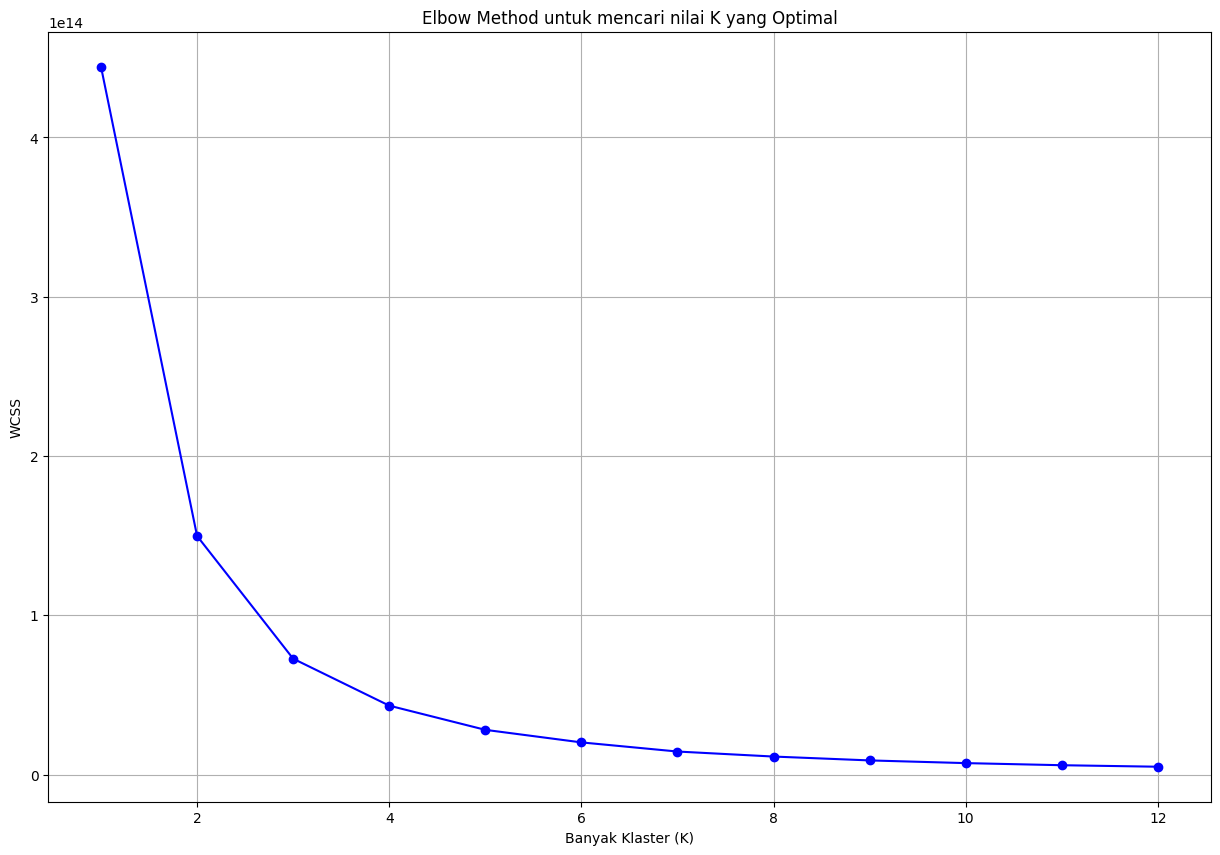

In [23]:

from sklearn.cluster import KMeans

X = dfAnime.select_dtypes(['int64' , 'float64']).values
wcss = []

for k in range(1, 13):
    model = KMeans(n_clusters=k, n_init=10, random_state=0)
    model.fit(X)
    wcss.append(model.inertia_)

plt.figure(figsize=(15, 10))
plt.plot(range(1, 13), wcss, marker='o', linestyle='-', color='b')
plt.title('Elbow Method untuk mencari nilai K yang Optimal')
plt.xlabel('Banyak Klaster (K)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

### GAMBARAN SCATTER PLOT DALAM PENG IMPLEMENTASIAN METODE K-MEANS

c:\Users\ashad\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ashad\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ashad\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ashad\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

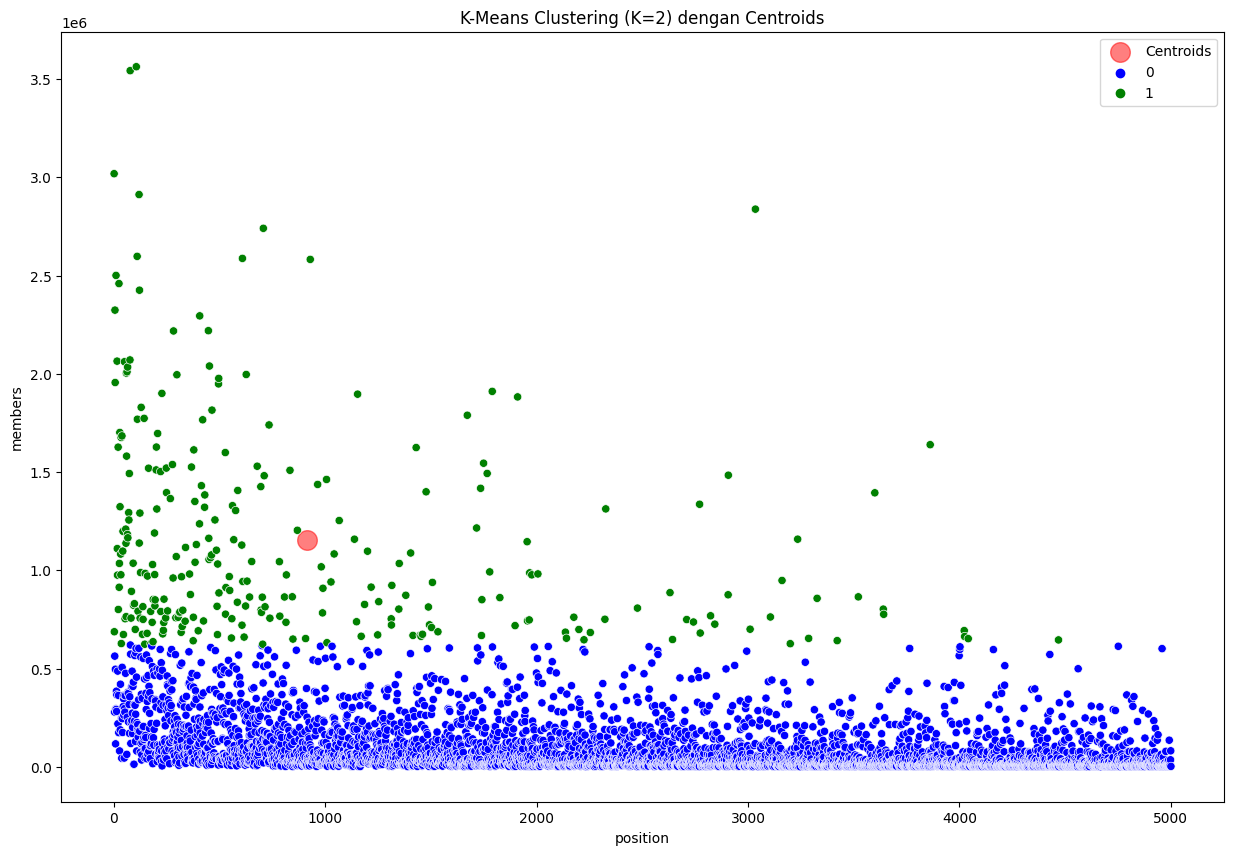

In [24]:
plt.figure(figsize=(15,10))

X = dfAnime[[posisi , member ]]
K = 2 
kmeans = KMeans(n_clusters=K, n_init=10) 
kmeans.fit(X) 
cluster_labels = kmeans.labels_ 
dfAnime["clusters"] = cluster_labels 
centroids = kmeans.cluster_centers_ 
warna = ["blue", "green"]
plt.scatter(centroids[:, 0], centroids[:, 1], alpha=0.5, c='red', s=200,label='Centroids')

sns.scatterplot(data=dfAnime, x=posisi, y=member, hue="clusters", palette=warna)

plt.title(f"K-Means Clustering (K={K}) dengan Centroids")
plt.xlabel(posisi)
plt.ylabel(member)
plt.legend()
plt.show()

## B2

### MELAKUKAN EVALUASI CLUSTERING TANPA LABEL ASLI

In [25]:
from sklearn.metrics import silhouette_score, davies_bouldin_score,calinski_harabasz_score

ss_score = silhouette_score(X, cluster_labels)
print(f"Silhouette Score: {ss_score:.2f}")
db_index = davies_bouldin_score(X, cluster_labels)
print(f"Davies-Bouldin Index: {db_index:.2f}")
ch_index = calinski_harabasz_score(X, cluster_labels)
print(f"Calinski-Harabasz Index: {ch_index:.2f}")

Silhouette Score: 0.86
Davies-Bouldin Index: 0.47
Calinski-Harabasz Index: 9832.35


### MELAKUKAN EVALUASI CLUSTERING DENGAN LABEL ASLI DAN MEMBUAT CROSS TABLE NYA

In [26]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, homogeneity_score, completeness_score, v_measure_score
import numpy as np
import pandas as pd

# Mengasumsikan dfAnime adalah DataFrame dan popularity adalah nama kolom
popularity = 'popularity'  # Ganti dengan nama kolom sebenarnya
cluster_labels = np.random.randint(0, 3, size=5000)  # Sampel label klaster

# Ekstrak label sebenarnya dari DataFrame dan konversi menjadi array 1D
true_labels = dfAnime[popularity].values.flatten()

# Hitung indeks Rand terkoreksi, informasi mutual terkoreksi, dan skor homogenitas
ari = adjusted_rand_score(true_labels, cluster_labels)
nmi = normalized_mutual_info_score(true_labels, cluster_labels)
homogeneity = homogeneity_score(true_labels, cluster_labels)
completeness = completeness_score(true_labels, cluster_labels)
v_measure = v_measure_score(true_labels, cluster_labels)

print("Adjusted Rand Index:", ari)
print("Normalized Mutual Information:", nmi)
print("Homogeneity Score:", homogeneity)
print("Completeness Score:", completeness)
print("V-Measure Score:", v_measure)

# Hitung popularitas label
true_label_counts = pd.Series(true_labels).value_counts()
cluster_label_counts = pd.Series(cluster_labels).value_counts()

# Buat crosstab untuk membandingkan label klaster dengan label sebenarnya menggunakan popularitas label
cross_tab_popularity = pd.crosstab(cluster_labels, true_labels)

print("Tabel Silang (dengan Popularitas Label):")
cross_tab_popularity


Adjusted Rand Index: 1.4390943424637365e-06
Normalized Mutual Information: 0.2278517513563264
Homogeneity Score: 0.12862820636995245
Completeness Score: 0.9967182316061044
V-Measure Score: 0.22785175135632638
Tabel Silang (dengan Popularitas Label):


col_0,1,2,3,4,5,6,7,8,9,10,...,14138,14345,14438,14642,14902,15586,16660,16729,16842,16960
row_0,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,1,1,0,0,0,0,...,1,1,0,1,1,0,0,0,0,0
1,1,1,1,0,0,0,0,1,1,0,...,0,0,1,0,0,0,0,1,1,0
2,0,0,0,1,0,0,1,0,0,1,...,0,0,0,0,0,1,1,0,0,1


### B3

### PLOT DARI HASIL CLUSTERING

c:\Users\ashad\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ashad\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ashad\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ashad\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

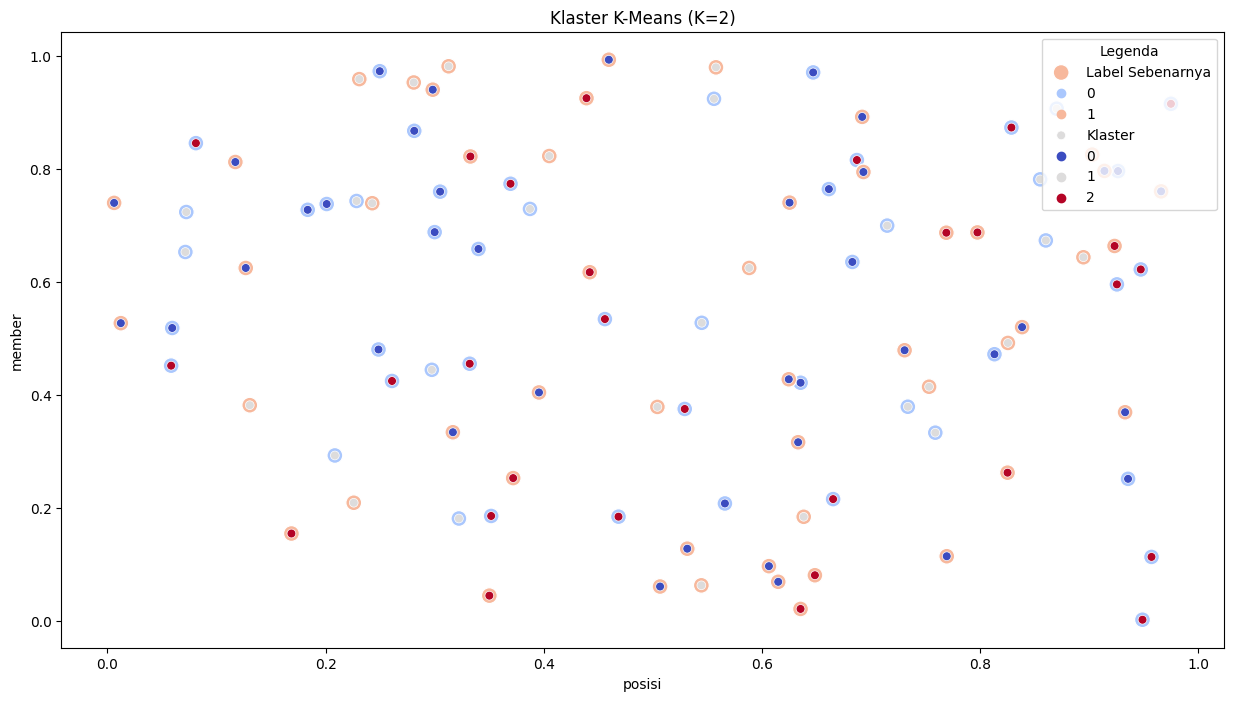

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Mengasumsikan dfAnime adalah DataFrame dan popularity adalah nama kolom
popularity = 'popularity'  # Ganti dengan nama kolom sebenarnya
posisi = 'posisi'  # Ganti dengan nama kolom sebenarnya
member = 'member'  # Ganti dengan nama kolom sebenarnya

# Data sampel untuk klaster dan label sebenarnya
dfAnime = pd.DataFrame({
    'posisi': np.random.rand(100),
    'member': np.random.rand(100),
    'popularity': np.random.randint(0, 2, 100),
    'clusters': np.random.randint(0, 3, 100)
})

# Pemetaan klaster
pemetaan_klaster = {0: 1, 1: 0, 2: 2}
dfAnime["klaster2"] = dfAnime["clusters"].map(pemetaan_klaster)

plt.figure(figsize=(15, 8))

# Plot label sebenarnya
sns.scatterplot(data=dfAnime, x=posisi, y=member,
                hue=popularity, marker="o", s=130, palette="coolwarm", label="Label Sebenarnya")

# Plot klaster menggunakan pemetaan klaster
sns.scatterplot(data=dfAnime, x=posisi, y=member,
                hue="klaster2", marker="o", s=40, palette="coolwarm", label="Klaster")

plt.title("Klaster K-Means (K=2)")
plt.xlabel(posisi)
plt.ylabel(member)
plt.legend(title="Legenda", loc="upper right")
plt.show()
